## Experiments on 2D datasets

In [28]:
# import Libraries
import os
import utils
import loss as ls
import numpy as np
import torch
import sampling as sample
import evaluation_metrics as evaluate
import train2D
from train2D import train_2D
from datasets import gaussian_clusters, ring, swiss_roll, waves

# Set Global Seed
GLOBAL_SEED = 42
utils.set_global_seed(GLOBAL_SEED)

# Load Datasets
Cluster_data = gaussian_clusters.generate_gaussian_clusters()
Ring_data = ring.generate_intersecting_rings()
Swiss_roll_data = swiss_roll.generate_swiss_roll()
Waves_data = waves.generate_parallel_waves()
data_dict = {
    "Cluster_data": Cluster_data,
    "Ring_data": Ring_data,
    "Swiss_roll_data": Swiss_roll_data,
    "Waves_data": Waves_data
}


### Training the model on 2D datasets

For the provided data and scale_type, the below cell will train the models for all the four target objectives.

In [ ]:
# Run for all Losses
loss_type = [ls.diffusion_loss_x, ls.diffusion_loss_epsilon, ls.diffusion_loss_v, ls.diffusion_loss_score]
sample_type = [sample.sampling_x, sample.sampling_epsilon, sample.sampling_v, sample.sampling_score]
data = Cluster_data
for i,loss_used in enumerate(loss_type):
    print(loss_used.__name__)
    train_data, test_data = utils.split_train_test(data)
    loss_formulation = loss_used
    data_type = 'Cluster_data'
    scale_type = 'Weighted'
    t_embed = False
    sampling = sample_type[i]
    train_loss, test_loss, loss_vs_time, loss_vs_time_per_epoch = train_2D(train_data, 
                                                                            test_data, 
                                                                            data_type,
                                                                            scale_type, 
                                                                            loss_formulation, 
                                                                            t_embed = t_embed, 
                                                                            sampling=sampling, 
                                                                            plot_loss_by_time=False, 
                                                                            plot_samples=True,
                                                                            save_params = True)


### For executing multiple times

In [ ]:
# Run multiple times
loss_formulations = [ls.diffusion_loss_x ,ls.diffusion_loss_epsilon, ls.diffusion_loss_v, ls.diffusion_loss_score]
for loss in loss_formulations:
    print(loss.__name__)
    scale_type = 'ELBO'
    number_of_runs = 3
    for run in range(0,number_of_runs):
        train2D.save_results(loss, data_dict, scale_type, run_num = run+1, save_data_dict = True)

### Graphs and plots

### NELBO 

Cluster_data:
  epsilon: 2.3636
  x: 0.6777
  v: 2.5396
  score: 0.7657
Ring_data:
  epsilon: 2.5700
  x: 0.8785
  v: 2.5452
  score: 0.9577
Swiss_roll_data:
  epsilon: 2.5324
  x: 0.8640
  v: 2.4861
  score: 0.9493
Waves_data:
  epsilon: 2.6805
  x: 0.9104
  v: 2.6873
  score: 1.0210


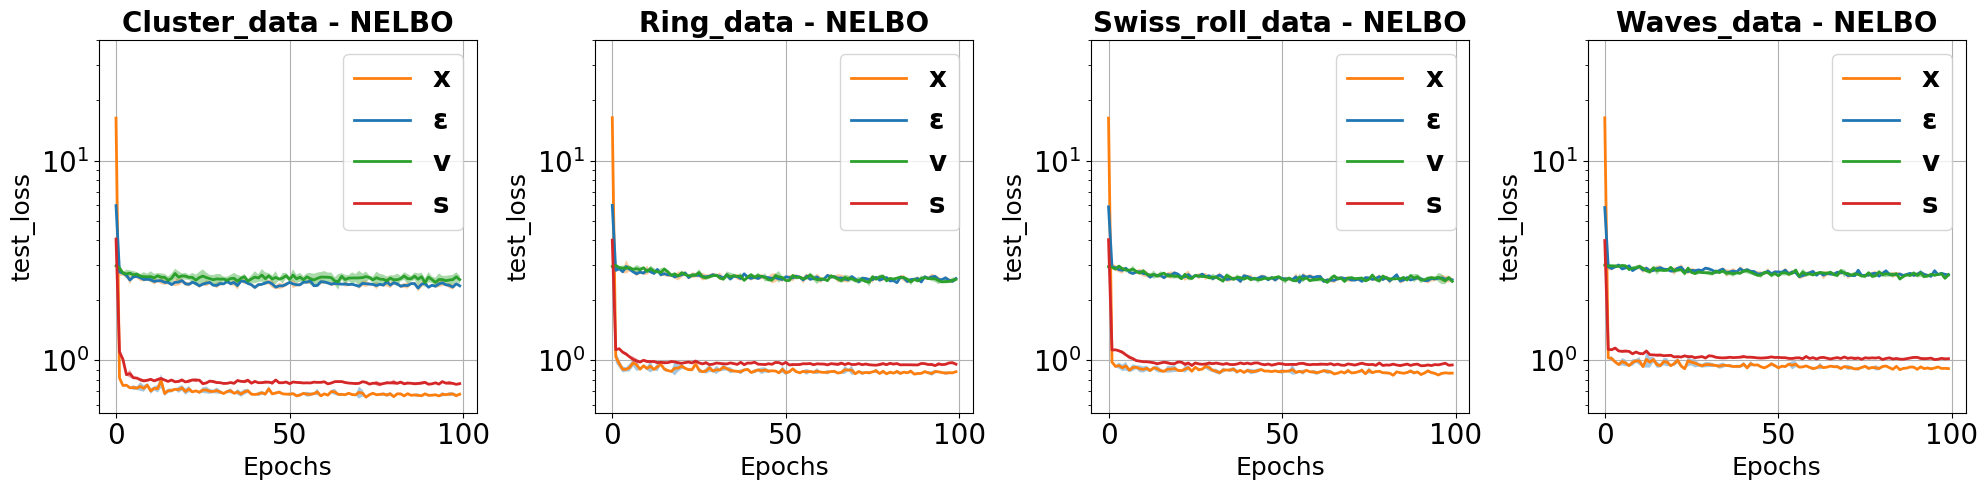

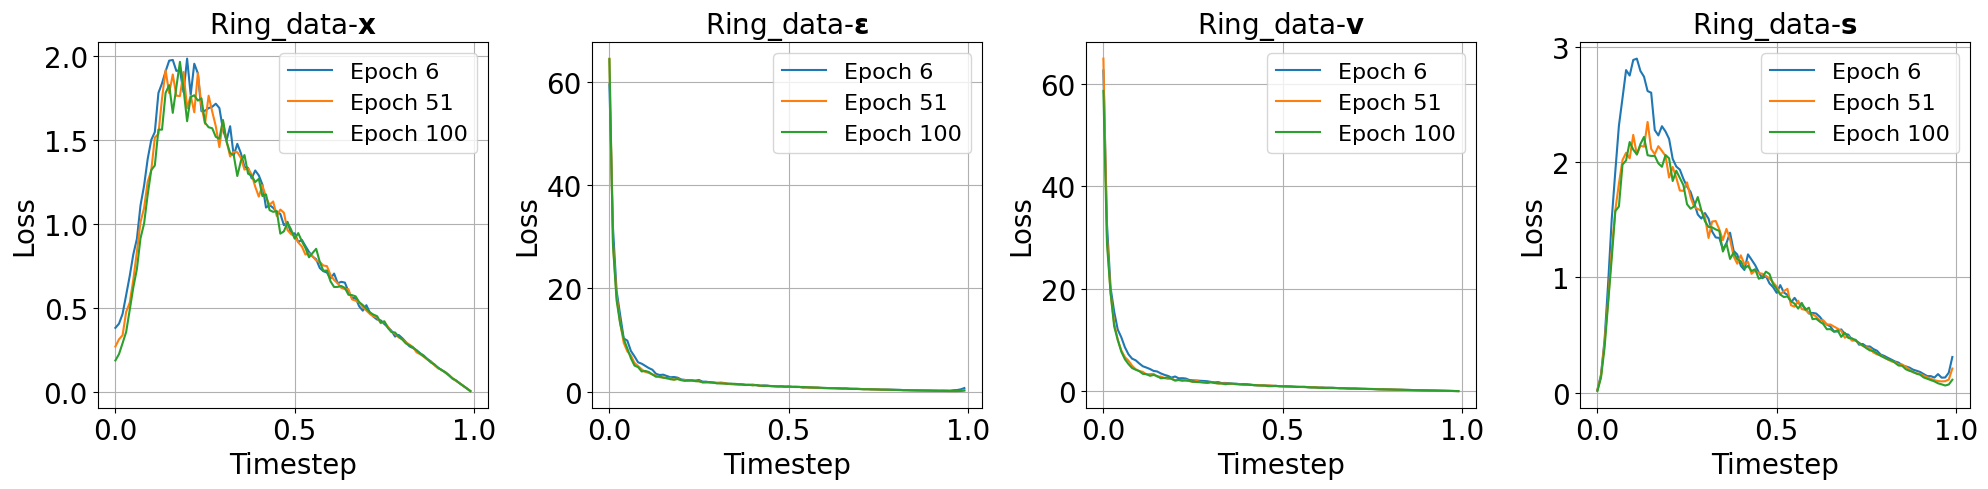

In [29]:

# path of saved results
base_path = "saved_data/2Dim/ELBO/"
loss_files = [
    "diffusion_loss_epsilon_training_results",
    "diffusion_loss_x_training_results",
    "diffusion_loss_v_training_results",
    "diffusion_loss_score_training_results"
]

# number of executions
executions = 3  

# calculate the average across 3 executions
avg_losses = utils.calculate_average_final_test_loss(base_path, loss_files, executions)

# To print the average test losses
for data_type, losses in avg_losses.items():
    print(f"{data_type}:")
    for loss_type, avg_loss in losses.items():
        if loss_type != "count":
            print(f"  {loss_type}: {avg_loss:.4f}")

# Plot for test or train
loss_type = 'test_loss'
scale_type = 'NELBO'
utils.plot_loss_across_epochs(base_path, loss_files, executions, loss_type, scale_type)

# Plot loss vs time for the given dataset
data_type = 'Ring_data'
utils.plot_loss_by_t_per_epoch(base_path, data_type)


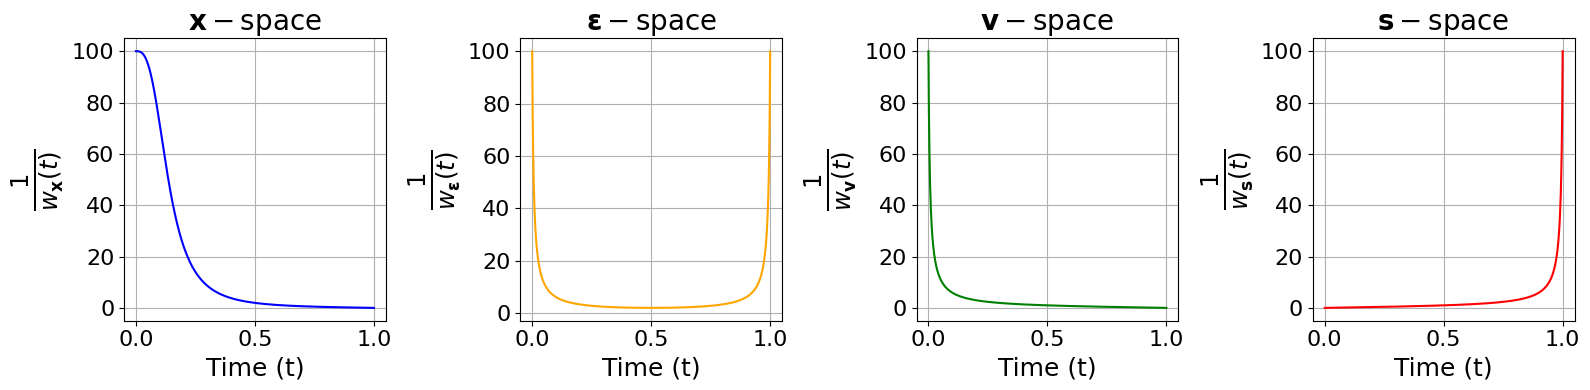

In [30]:
# Scaling coefficients of NELBO loss 
utils.plot_elbo_coefficients()

## Weighted Loss

Cluster_data:
  epsilon: 0.3522
  x: 0.4754
  v: 0.8264
  score: 2.6934
Ring_data:
  epsilon: 0.4266
  x: 0.4932
  v: 0.9227
  score: 3.0981
Swiss_roll_data:
  epsilon: 0.4261
  x: 0.4934
  v: 0.9171
  score: 3.0274
Waves_data:
  epsilon: 0.4500
  x: 0.4939
  v: 0.9411
  score: 3.4165


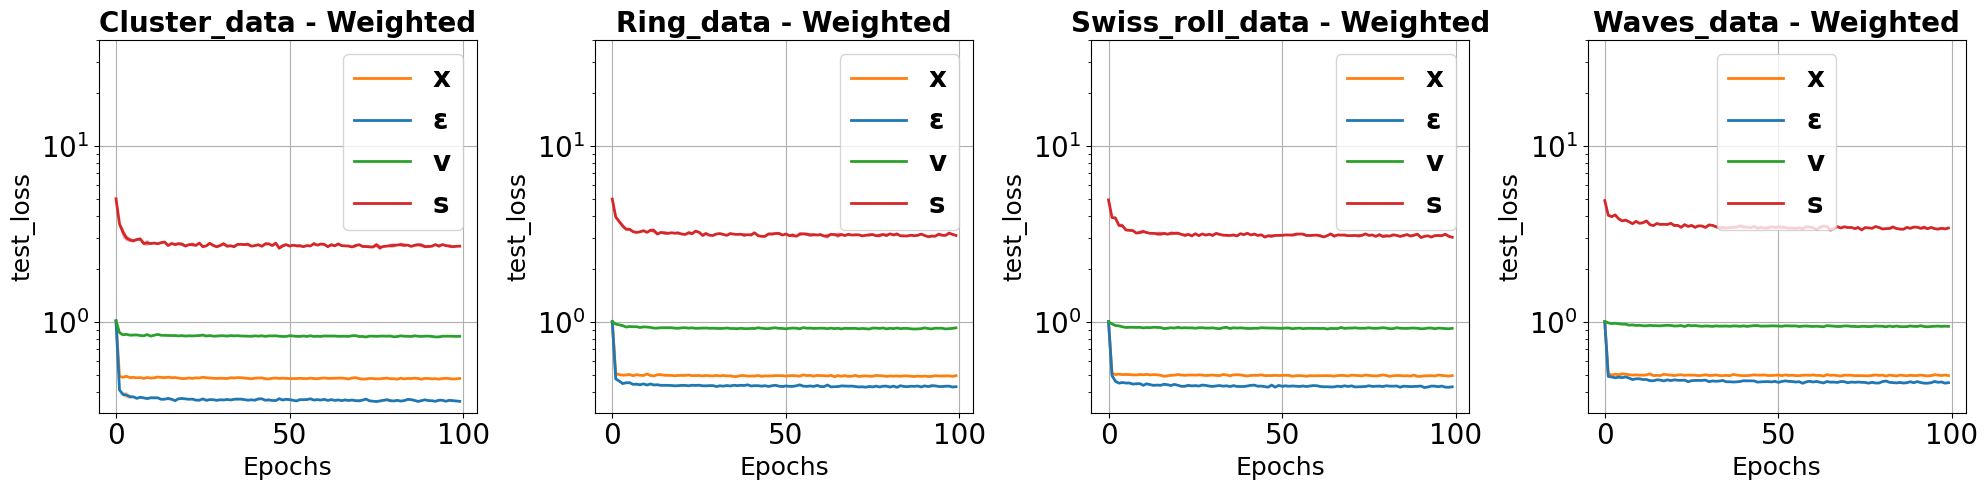

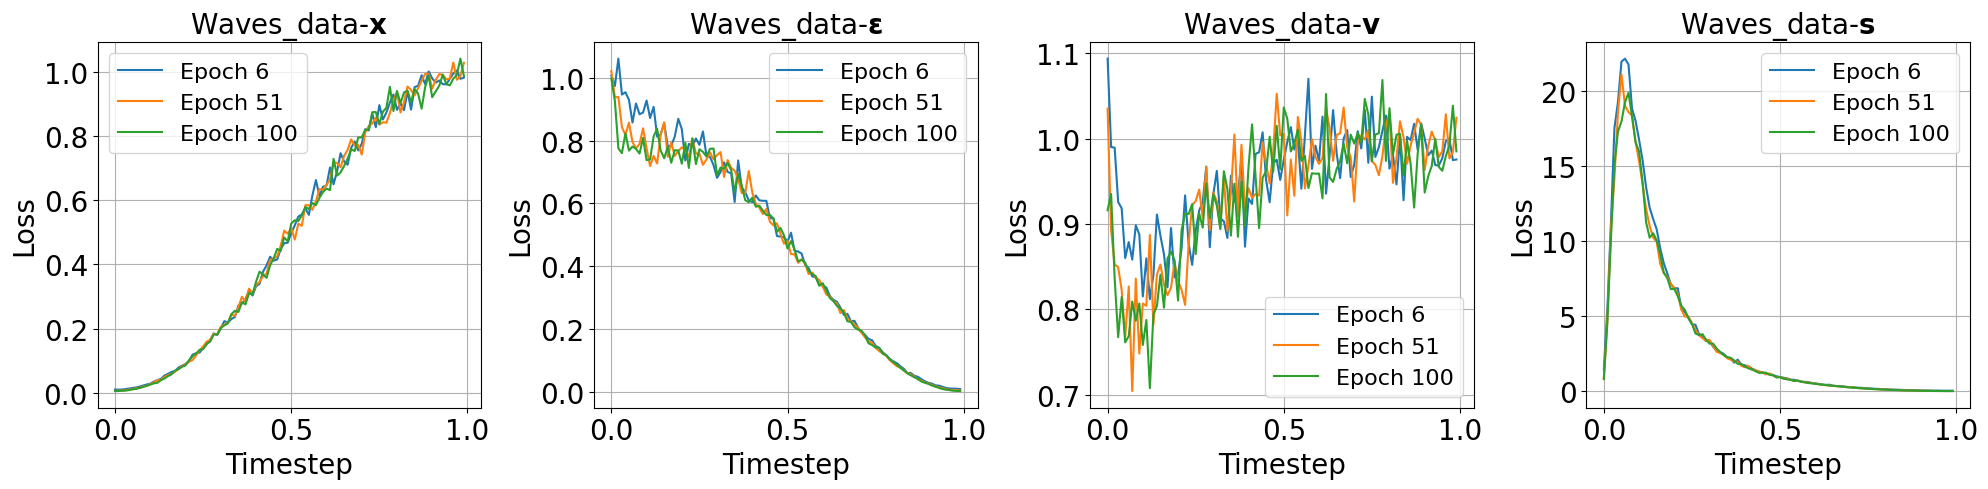

In [31]:
# path of saved results
base_path = "saved_data/2Dim/Weighted/"
loss_files = [
    "diffusion_loss_epsilon_training_results",
    "diffusion_loss_x_training_results",
    "diffusion_loss_v_training_results",
    "diffusion_loss_score_training_results"
]

# number of executions
executions = 3  

# calculate the average across 3 executions
avg_losses = utils.calculate_average_final_test_loss(base_path, loss_files, executions)

# Print out the average test losses
for data_type, losses in avg_losses.items():
    print(f"{data_type}:")
    for loss_type, avg_loss in losses.items():
        if loss_type != "count":
            print(f"  {loss_type}: {avg_loss:.4f}")


# Plot for test or train
loss_type = 'test_loss'
scale_type = 'Weighted'
utils.plot_loss_across_epochs(base_path, loss_files, executions, loss_type, scale_type)

# Plot loss vs time for the given dataset
data_type = 'Waves_data'
utils.plot_loss_by_t_per_epoch(base_path, data_type)


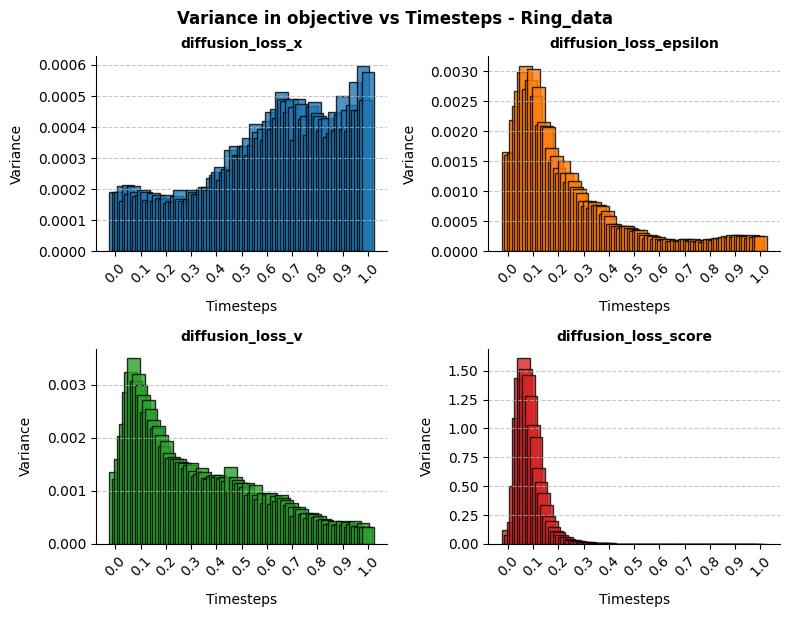

In [32]:
# Variance of weighted loss with respect to time step

loss_formulations = [
    ls.diffusion_loss_x,
    ls.diffusion_loss_epsilon,
    ls.diffusion_loss_v,
    ls.diffusion_loss_score,
]

data_type = "Ring_data"

utils.plot_variance_weighted(loss_formulations,data_type)



## Rescaled Loss

100%|██████████| 100/100 [00:14<00:00,  6.74it/s]
/home/k64728/Master_thesis_code/code/utils.py:775: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 40)


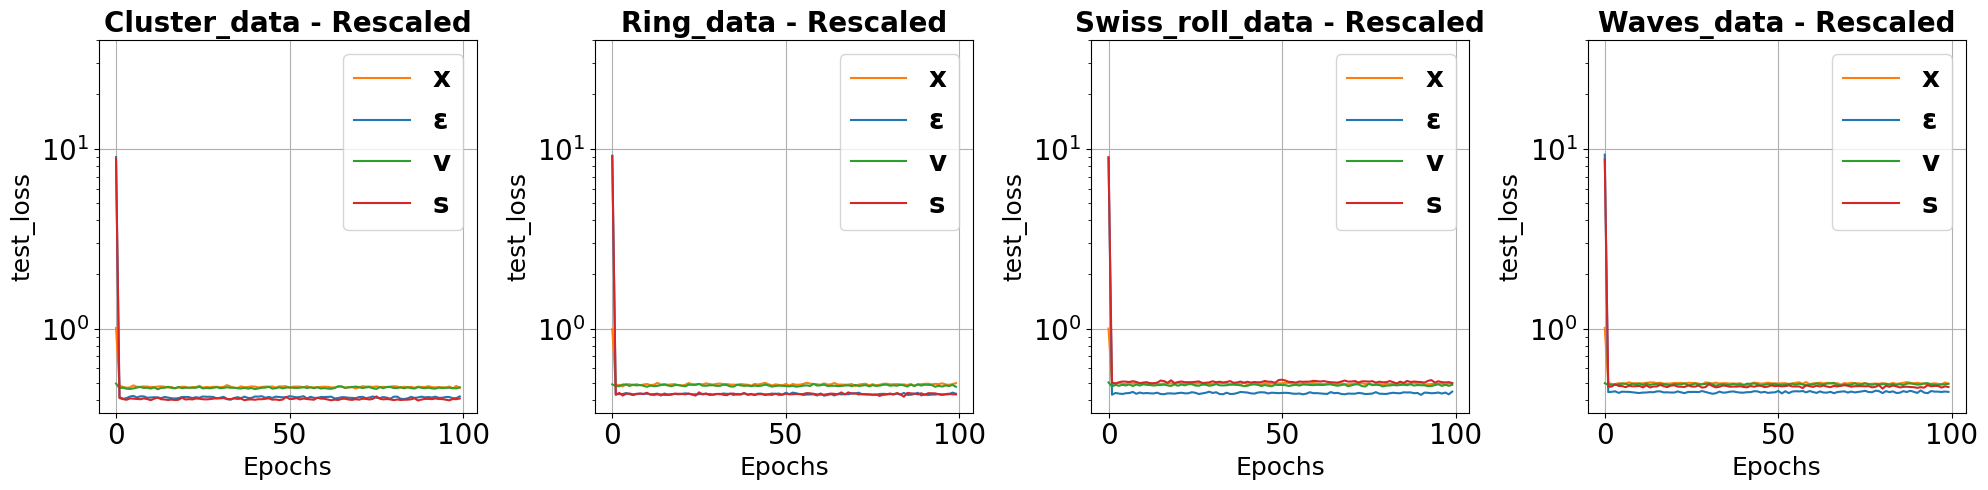

In [33]:
base_path = "saved_models/2Dim/Weighted"
Equivalent_losses = {}

# Rescale the weighted loss
for key,val in data_dict.items():
    _, test_data = utils.split_train_test(val)
    Equivalent_loss_dict = train2D.evaluate_on_scaled_loss(test_data, key)
    Equivalent_losses[key] = Equivalent_loss_dict

utils.plot_equivalent_losses(Equivalent_losses)

### Sample Generation and Quality


Metrics for data generated using diffusion_loss_x:
Mean Distance (Euclidean): 0.26778849920819303
Covariance Distance (Frobenius): 0.3461829289007881

Metrics for data generated using diffusion_loss_epsilon:
Mean Distance (Euclidean): 0.0921642050798729
Covariance Distance (Frobenius): 0.12716706846241146

Metrics for data generated using diffusion_loss_v:
Mean Distance (Euclidean): 0.028614435100142083
Covariance Distance (Frobenius): 0.054167331804461004

Metrics for data generated using diffusion_loss_score:
Mean Distance (Euclidean): 0.14076093890774355
Covariance Distance (Frobenius): 0.13538735442328573


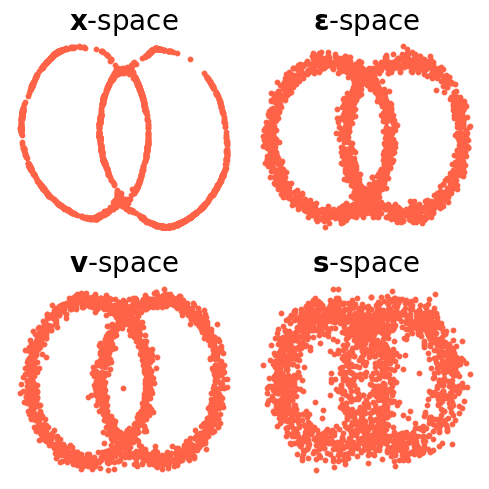

In [34]:
# Generate samples after 512 sampling steps
base_path = "saved_models/2Dim/"
scale_type = 'ELBO'
real_data = Ring_data
data_type = 'Ring_data'
losses = [ls.diffusion_loss_x, ls.diffusion_loss_epsilon, ls.diffusion_loss_v, ls.diffusion_loss_score]
sample_type = [sample.sampling_x, sample.sampling_epsilon, sample.sampling_v, sample.sampling_score]
all_samples = np.zeros((4, 2000, 2))
for i,loss_type in enumerate(losses):
    file_name = f"{loss_type.__name__}_model"
    model_path = os.path.join(base_path,scale_type,data_type,file_name)
    _, model = train2D.run_saved_model_2D(model_path)
    device = next(model.parameters()).device
    rand_data = torch.randn((2000,2))
    num_steps = 512
    sample_func = sample_type[i]
    gen_sample = sample_func(model, rand_data, device, num_steps).detach().cpu().numpy()
    gen_sample_quality = evaluate.compute_moment_metrics(real_data, gen_sample)
    print(f"\nMetrics for data generated using {loss_type.__name__}:")
    print("Mean Distance (Euclidean):", gen_sample_quality['mean_distance'])
    print("Covariance Distance (Frobenius):", gen_sample_quality['covariance_distance'])
    all_samples[i] = gen_sample

utils.plot_samples(all_samples, data_type)



### Generate samples from different time steps

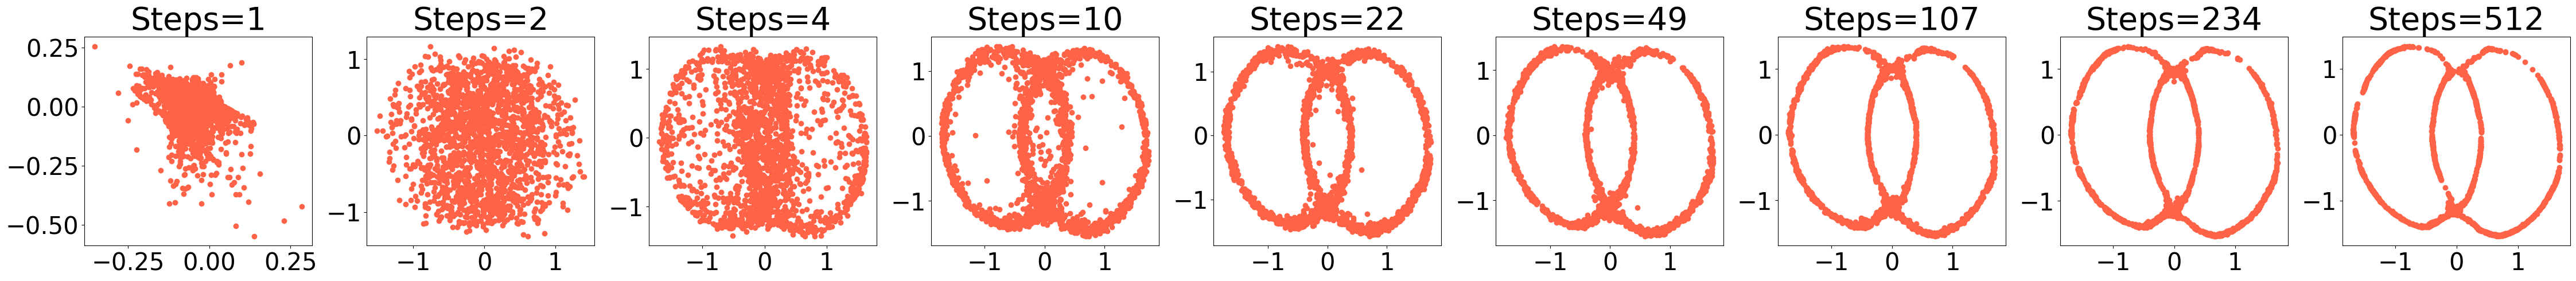

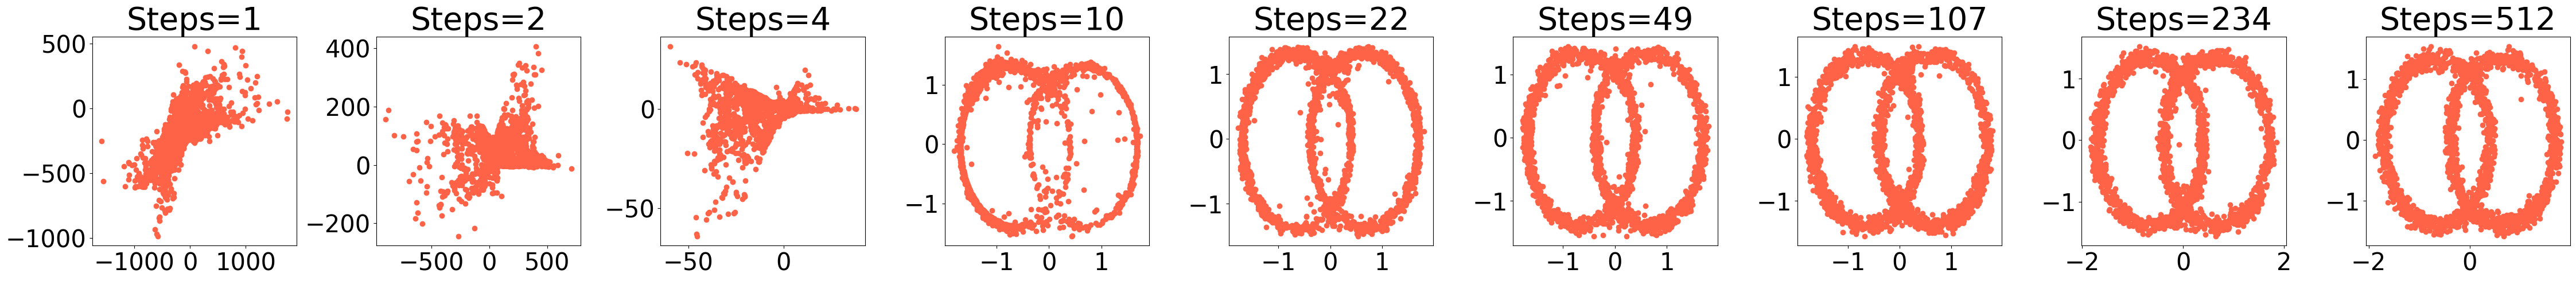

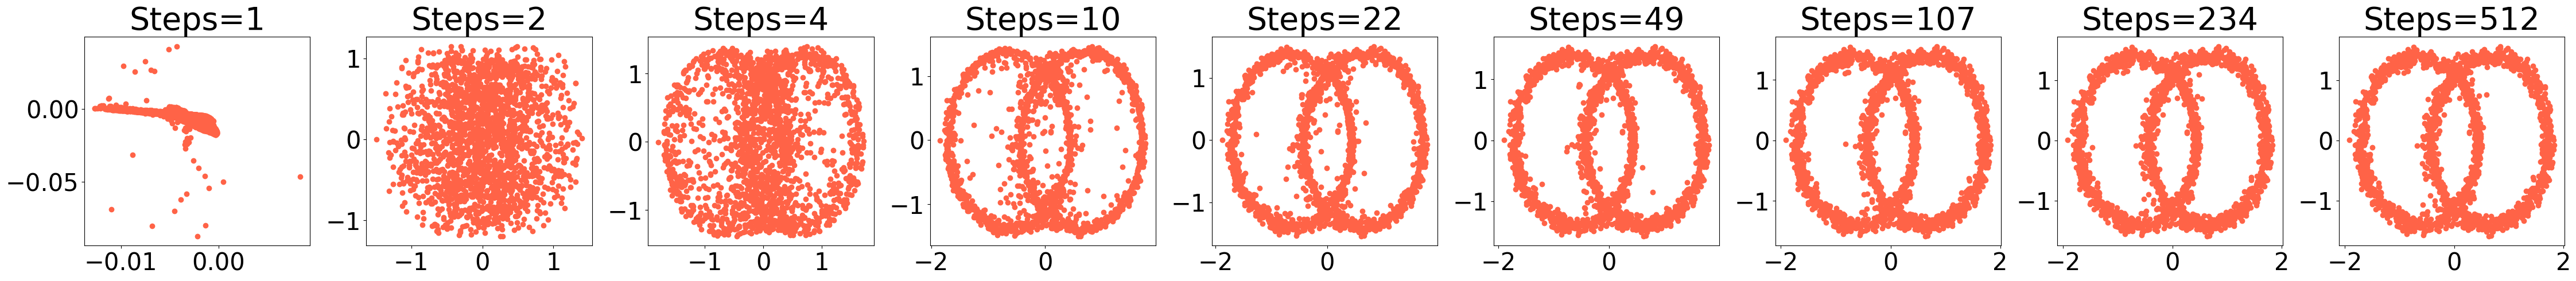

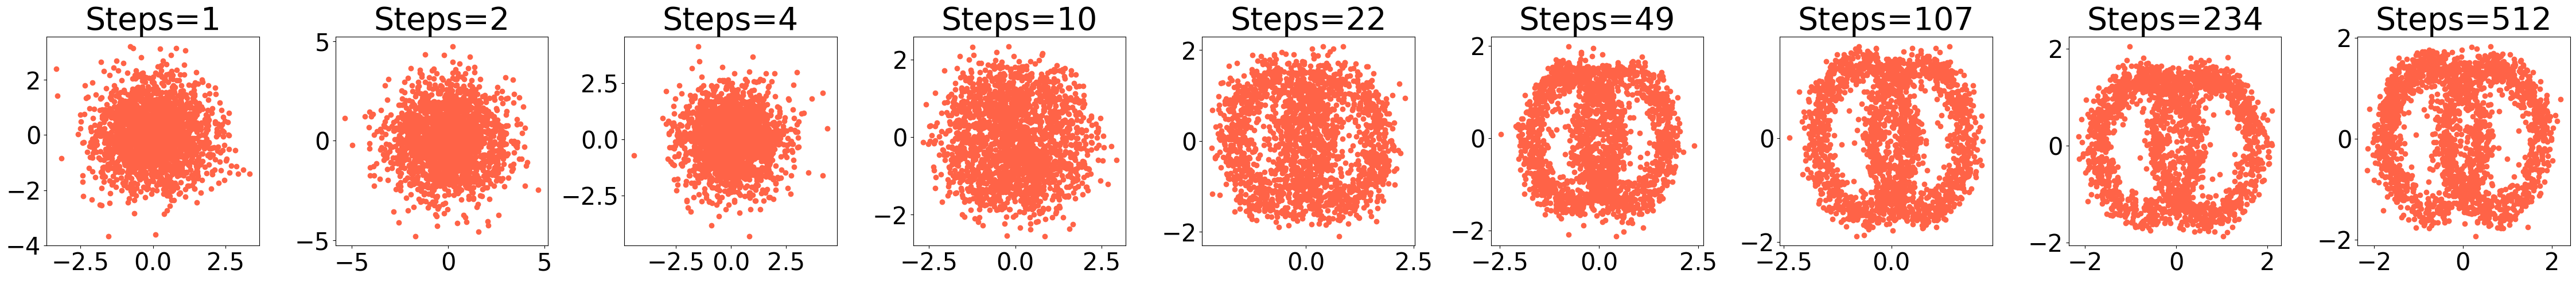

In [35]:
base_path = "saved_models/2Dim/"
scale_type = 'ELBO'
real_data = Ring_data
data_type = 'Ring_data'
losses = [ls.diffusion_loss_x, ls.diffusion_loss_epsilon, ls.diffusion_loss_v, ls.diffusion_loss_score]
sample_type = [sample.sampling_x, sample.sampling_epsilon, sample.sampling_v, sample.sampling_score]
all_samples = np.zeros((4, 2000, 2))
for i,loss_type in enumerate(losses):
    file_name = f"{loss_type.__name__}_model"
    model_path = os.path.join(base_path,scale_type,data_type,file_name)
    _, model = train2D.run_saved_model_2D(model_path, data_type, sampling = sample_type[i], plot_samples = True)

